#Data Sales E-commerce Fiktif


This dataset is a fictional e-commerce sales dataset generated by AI. It contains sales data categorized by product categories, including the cities where sales occurred and the payment methods used, covering the period from January 2024 to May 2025. In this project, I will explore various methods for data cleaning, exploratory data analysis (EDA), and data visualization using Python, along with several frameworks to facilitate the analysis.

#Import Library

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Nonaktifkan warning FutureWarning

#Load Datasest

In [92]:
#load dataset
data=pd.read_csv("/content/ecommerce_sales.csv", delimiter=",")
#Buat salinan data
datakuh=data.copy()
datakuh.head()

,Order_ID,Date,Product,Category,Price,Quantity,Customer_Location,Payment_Method
0,1001,2024-01-01,Tablet,Accessories,4380993,4,Medan,Bank Transfer
1,1002,2024-01-02,Smartwatch,Accessories,13620110,2,Yogyakarta,E-Wallet
2,1003,2024-01-03,Headphones,Accessories,14467111,2,Jakarta,E-Wallet
3,1004,2024-01-04,Smartwatch,Electronics,3068103,1,Yogyakarta,E-Wallet
4,1005,2024-01-05,Smartwatch,Accessories,8969872,1,Bandung,E-Wallet


The loaded dataset contains 8 columns, which include: Order_ID, Date, Product, Category, Price, Quantity, Customer_Location, Payment_Method, Total_Sales, Month_Year, and Day_of_Week.
In the next stage, I will apply techniques such as derivation, deduplication, imputation (if applicable), and transformation.

#Check Dataset Information

In [93]:

datakuh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order_ID           500 non-null    int64 
 1   Date               500 non-null    object
 2   Product            500 non-null    object
 3   Category           500 non-null    object
 4   Price              500 non-null    int64 
 5   Quantity           500 non-null    int64 
 6   Customer_Location  500 non-null    object
 7   Payment_Method     500 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


#Statistics Descriptive

In [94]:
datakuh.describe()

,Order_ID,Price,Quantity
count,500.000000,5.000000e+02,500.000000
mean,1250.500000,1.044409e+07,2.490000
std,144.481833,5.383152e+06,1.126249
min,1001.000000,5.643230e+05,1.000000
25%,1125.750000,6.065718e+06,1.000000
50%,1250.500000,1.043067e+07,2.000000
75%,1375.250000,1.464505e+07,4.000000
max,1500.000000,1.999648e+07,4.000000


In [95]:

stats = datakuh.describe().transpose()
stats = stats.map(lambda x: f"{x:,.2f}")

stats

,count,mean,std,min,25%,50%,75%,max
Order_ID,500.00,"1,250.50",144.48,"1,001.00","1,125.75","1,250.50","1,375.25","1,500.00"
Price,500.00,"10,444,087.15","5,383,152.40","564,323.00","6,065,717.50","10,430,667.50","14,645,047.00","19,996,485.00"
Quantity,500.00,2.49,1.13,1.00,1.00,2.00,4.00,4.00


#Check the Number of Missing Values

In [96]:
datakuh.isnull().sum()

,0
Order_ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Customer_Location,0
Payment_Method,0


### Converting the Date Column to Datetime Format

In [97]:

datakuh["Date"] = pd.to_datetime(datakuh["Date"])

datakuh.dtypes

,0
Order_ID,int64
Date,datetime64[ns]
Product,object
Category,object
Price,int64
Quantity,int64
Customer_Location,object
Payment_Method,object


#Filter Date ( Januari 2024-April 2025)

In [98]:

start_date = "2024-01-01"
end_date = "2025-05-01"

datakuh = datakuh[(datakuh["Date"] >= start_date) & (datakuh["Date"] < end_date)]

datakuh

,Order_ID,Date,Product,Category,Price,Quantity,Customer_Location,Payment_Method
0,1001,2024-01-01,Tablet,Accessories,4380993,4,Medan,Bank Transfer
1,1002,2024-01-02,Smartwatch,Accessories,13620110,2,Yogyakarta,E-Wallet
2,1003,2024-01-03,Headphones,Accessories,14467111,2,Jakarta,E-Wallet
3,1004,2024-01-04,Smartwatch,Electronics,3068103,1,Yogyakarta,E-Wallet
4,1005,2024-01-05,Smartwatch,Accessories,8969872,1,Bandung,E-Wallet
...,...,...,...,...,...,...,...,...
481,1482,2025-04-26,Tablet,Accessories,8695810,3,Yogyakarta,Credit Card
482,1483,2025-04-27,Smartphone,Accessories,7685197,4,Surabaya,Debit Card
483,1484,2025-04-28,Smartwatch,Accessories,7214301,4,Yogyakarta,E-Wallet
484,1485,2025-04-29,Laptop,Accessories,11692304,4,Surabaya,Bank Transfer


### Checking & Removing Duplicate Data (If Any)

In [99]:
# Adding the total_sales Column
datakuh["Total_Sales"] = datakuh["Price"] * datakuh["Quantity"]

# Display the Data to Check if it Was Successfu
datakuh[["Price", "Quantity", "Total_Sales"]]

<ipython-input-99-ae689c9ed14c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datakuh["Total_Sales"] = datakuh["Price"] * datakuh["Quantity"]


,Price,Quantity,Total_Sales
0,4380993,4,17523972
1,13620110,2,27240220
2,14467111,2,28934222
3,3068103,1,3068103
4,8969872,1,8969872
...,...,...,...
481,8695810,3,26087430
482,7685197,4,30740788
483,7214301,4,28857204
484,11692304,4,46769216


### Comprehensive Total Sales Analysis

In [100]:
# Calculate the total overall sales
total_sales = datakuh["Total_Sales"].sum()

# Format the number for better readability
total_sales_formatted = f"{total_sales:,.2f}"

# Display the result
print(f"Total Overall Sales: Rp {total_sales_formatted}")


Total Overall Sales: Rp 12,606,791,998.00


From the results above, it is evident that the total overall sales exceed 12 billion Rupiah.

### Sales Trend Visualization Over Time

<ipython-input-101-4c0012ae05e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datakuh["Month_Year"] = datakuh["Date"].dt.to_period("M")


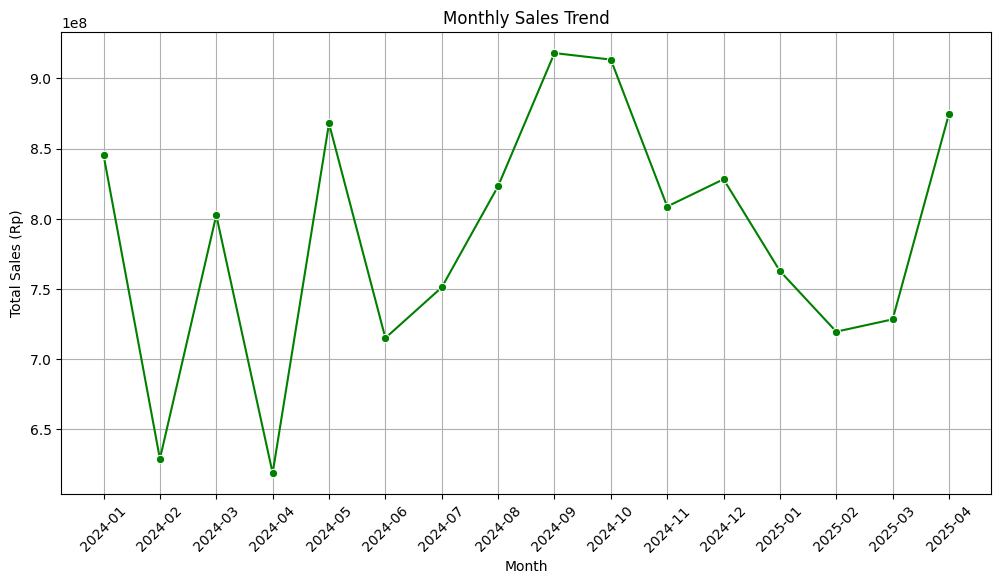

In [101]:
# Create Month & Year column from the Date column
datakuh["Month_Year"] = datakuh["Date"].dt.to_period("M")

# Filter data for the desired time range
data_filtered = datakuh[(datakuh["Date"] >= "2024-01-01") &
                           (datakuh["Date"] < "2025-05-01")]

# Calculate total sales per month
monthly_sales = data_filtered.groupby("Month_Year")["Total_Sales"].sum().reset_index()

# Convert Month_Year to string for easier plotting
monthly_sales["Month_Year"] = monthly_sales["Month_Year"].astype(str)

# Plot the monthly sales graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month_Year", y="Total_Sales",
             marker="o", color="g")

# Format the plot
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales (Rp)")
plt.title("Monthly Sales Trend")
plt.grid(True)

# Display the plot
plt.show()


From the line chart above, the period from January 2024 to June 2024 shows fluctuations or instability in sales. There is an increase from June 2024 to September 2024, followed by a decline until March 2025. However, in April 2025, there is an increase in sales. Since the data for May 2025 is incomplete, it is not displayed

In [102]:
# Display detailed sales from January 2024 to April 2025
monthly_sales["Total_Sales"] = monthly_sales["Total_Sales"].apply(lambda x: f"{x:,.0f}")

monthly_sales


,Month_Year,Total_Sales
0,2024-01,"845,500,887"
1,2024-02,"628,861,143"
2,2024-03,"802,565,969"
3,2024-04,"618,733,138"
4,2024-05,"867,949,543"
5,2024-06,"715,010,176"
6,2024-07,"751,078,487"
7,2024-08,"823,219,217"
8,2024-09,"918,100,508"
9,2024-10,"913,458,596"


### Analysis of the Best-Selling Product Categories

In [103]:
# Calculate total sales per category
category_sales = datakuh.groupby("Category")["Total_Sales"].sum().reset_index()

# Sort from largest to smallest
category_sales = category_sales.sort_values(by="Total_Sales", ascending=False)


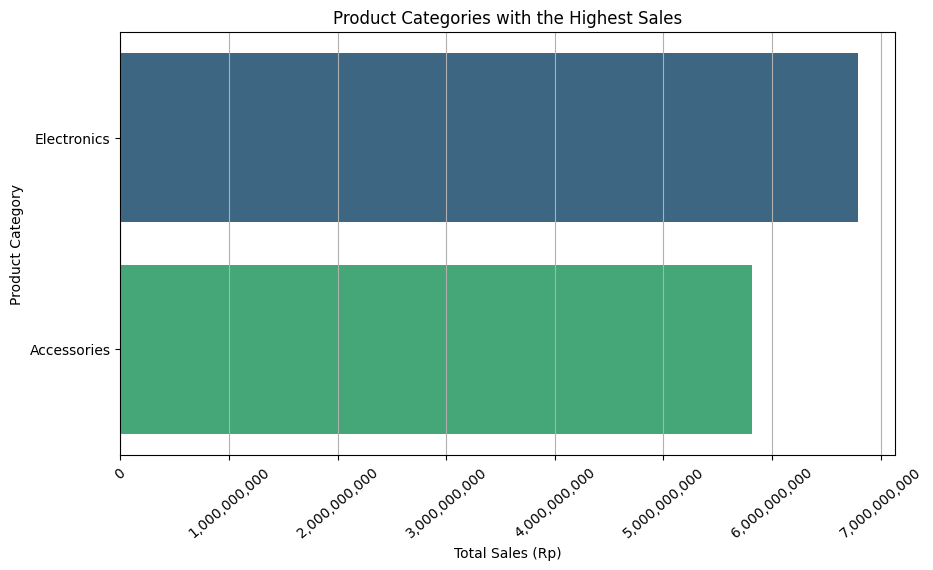

In [104]:
# Plot bar chart
plt.figure(figsize=(10, 5.5))
sns.barplot(data=category_sales, x="Total_Sales", y="Category", palette="viridis")

# Format the X-axis for better readability of numbers
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Format the plot
plt.xlabel("Total Sales (Rp)")
plt.ylabel("Product Category")
plt.title("Product Categories with the Highest Sales")
plt.xticks(rotation=40)
plt.grid(axis="x")

# Display the plot
plt.show()


Based on the available sales data, products in the Electronics category recorded the highest total sales, reaching approximately Rp 7 billion. In comparison, the Accessories category ranked second with total sales of nearly Rp 6 billion. The sales difference between the two categories is around Rp 1 billion, indicating that electronic products have higher demand or transaction value compared to accessories. This insight can be a valuable consideration for shaping future business strategies, particularly in terms of inventory management, promotions, and product development.

### Analysis of the Most Popular Payment Methods

In [105]:
# Calculate the number of transactions per payment method
payment_counts = datakuh["Payment_Method"].value_counts().reset_index()
payment_counts.columns = ["Payment_Method", "Transaction_Count"]


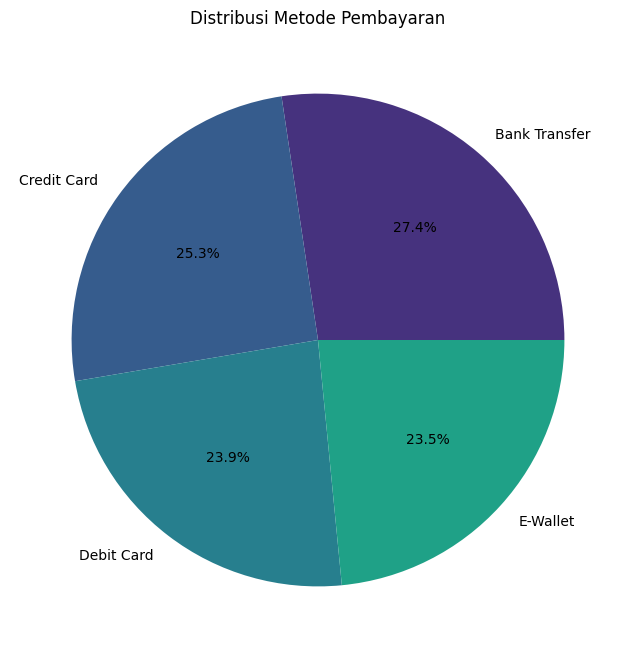

In [106]:
# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(payment_counts["Transaction_Count"], labels=payment_counts["Payment_Method"], autopct="%1.1f%%", colors=sns.color_palette("viridis"))

# Format plot
plt.title("Distribusi Metode Pembayaran")
plt.show()

Based on the data presented, the most commonly used payment method among customers is Bank Transfer, accounting for 27.4% of total transactions. Coming in second is Credit Card with 25.3%, followed by Debit Card at 23.9%, and E-Wallet at 23.5%. Although the differences are relatively small, the dominance of Bank Transfer suggests it remains the preferred option for many customers.

### Analysis of Popular Payment Methods

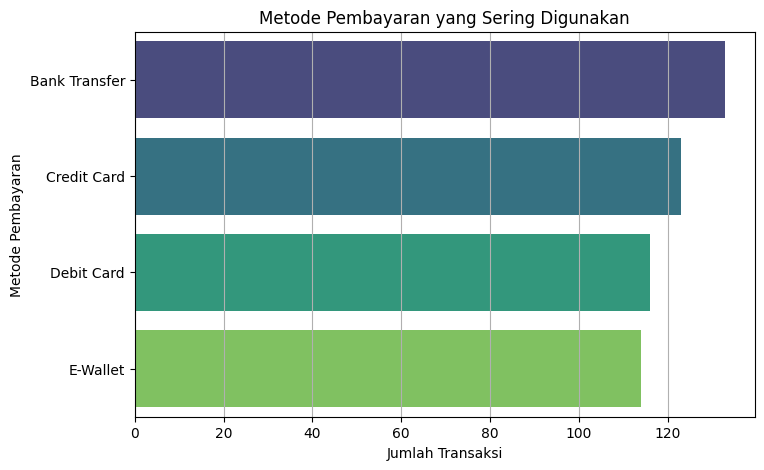

In [107]:
# Plot metode pembayaran
plt.figure(figsize=(8,5))
sns.barplot(data=payment_counts, x="Transaction_Count", y="Payment_Method", palette="viridis")

# Format Plot
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.title("Metode Pembayaran yang Sering Digunakan")
plt.grid(axis="x")

plt.show()

Similar to the previous pie chart, this bar chart shows the total usage of the most frequently used payment methods, with bank transfer being the highest and e-wallet the lowest.

### Analisis Lokasi Pelanggan dengan Transaksi Terbanyak

In [124]:
# Count the number of transactions per customer location
location_sales = datakuh["Customer_Location"].value_counts().reset_index()
location_sales.columns = ["Customer_Location", "Transaction_Count"]

location_sales = location_sales.sort_values(by="Transaction_Count", ascending=False)
location_sales


,Customer_Location,Transaction_Count
0,Surabaya,106
1,Medan,105
2,Yogyakarta,102
3,Jakarta,94
4,Bandung,79


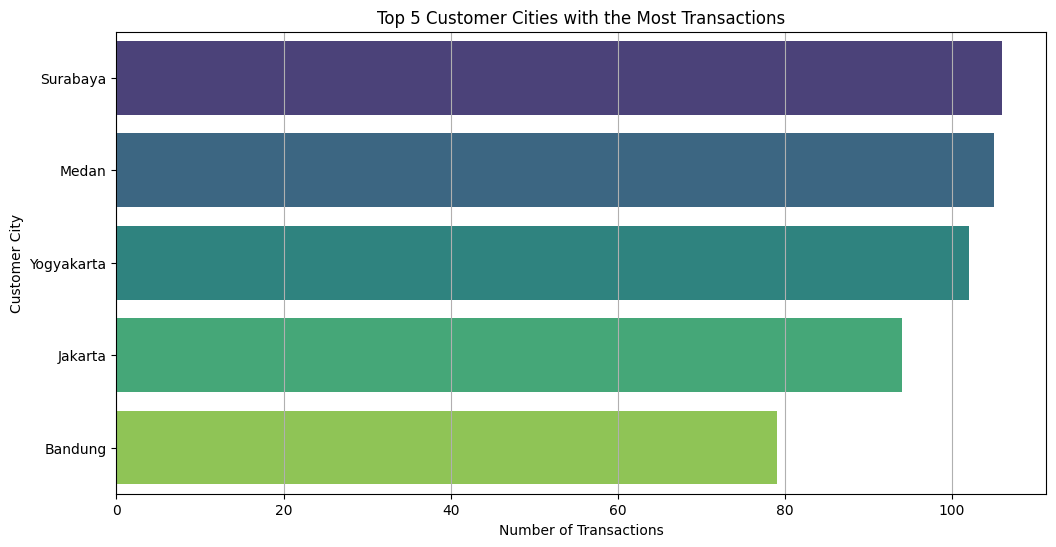

In [125]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=location_sales, x="Transaction_Count", y="Customer_Location", palette="viridis")

# Format the plot
plt.xlabel("Number of Transactions")
plt.ylabel("Customer City")
plt.title("Top 5 Customer Cities with the Most Transactions")
plt.grid(axis="x")

plt.show()


Based on the chart, the city with the highest number of customer transactions is Surabaya, followed by Medan, Yogyakarta, Jakarta, and Bandung. Surabaya leads in transaction volume, indicating it is a highly active market for e-commerce sales. Medan and Yogyakarta also show strong transaction levels, slightly below Surabaya. Meanwhile, Jakarta and Bandung rank fourth and fifth, respectively.

### Customer Segmentation Based on Total Purchases

In [128]:
# Calculate total spending per customer location
customer_spending = datakuh.groupby("Customer_Location")["Total_Sales"].sum().reset_index()

# Sort by highest spending
customer_spending = customer_spending.sort_values(by="Total_Sales", ascending=False)


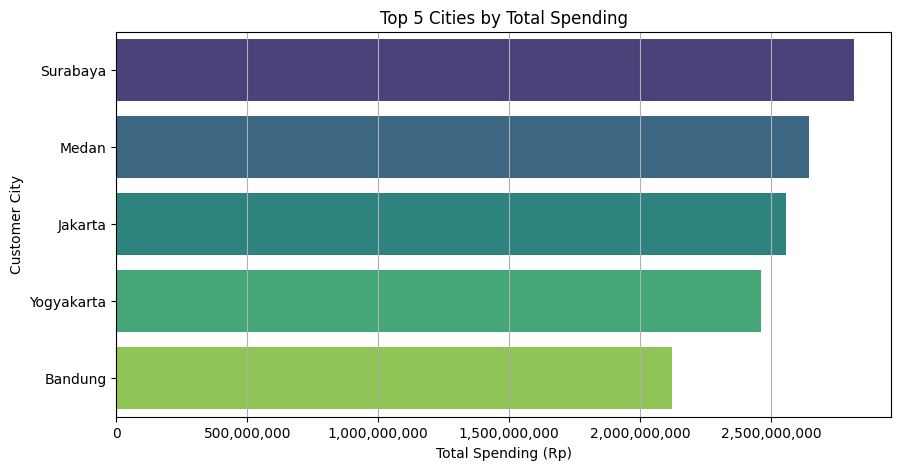

In [129]:
# Convert to numeric
customer_spending["Total_Sales"] = pd.to_numeric(customer_spending["Total_Sales"], errors="coerce")
customer_spending["Customer_Location"] = customer_spending["Customer_Location"].astype(str)

# Plot total customer spending chart
plt.figure(figsize=(10, 5))
sns.barplot(data=customer_spending.head(5), x="Total_Sales", y="Customer_Location", palette="viridis")

# Format the X-axis for better readability
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Format the plot
plt.xlabel("Total Spending (Rp)")
plt.ylabel("Customer City")
plt.title("Top 5 Cities by Total Spending")
plt.grid(axis="x")

plt.show()


Based on cities, Surabaya recorded the highest sales with a total of over 2.8 billion Rupiah, while Bandung had the lowest with total sales of 2.1 billion Rupiah.

In [130]:
# Display total sales by city with a comma as a thousand separator
customer_spending["Total_Sales"] = customer_spending["Total_Sales"].apply(lambda x: f"{x:,.0f}")

customer_spending


,Customer_Location,Total_Sales
3,Surabaya,"2,819,451,192"
2,Medan,"2,644,791,118"
1,Jakarta,"2,556,541,059"
4,Yogyakarta,"2,461,801,491"
0,Bandung,"2,124,207,138"


###Purchase Pattern Based on Day of the Week

In [131]:
import pandas as pd

# Ensure 'Date' is in datetime format
datakuh["Date"] = pd.to_datetime(datakuh["Date"])

# Create a new column for the day of the week
datakuh["Day_of_Week"] = datakuh["Date"].dt.day_name()

# Count the number of transactions per day, and sort by day of the week
sales_per_day = datakuh["Day_of_Week"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()

# Rename columns for clearer results
sales_per_day.columns = ["Day_of_Week", "Transaction_Count"]

# Display the results
print(sales_per_day)


  Day_of_Week  Transaction_Count
0      Monday                 70
1     Tuesday                 70
2   Wednesday                 70
3    Thursday                 69
4      Friday                 69
5    Saturday                 69
6      Sunday                 69


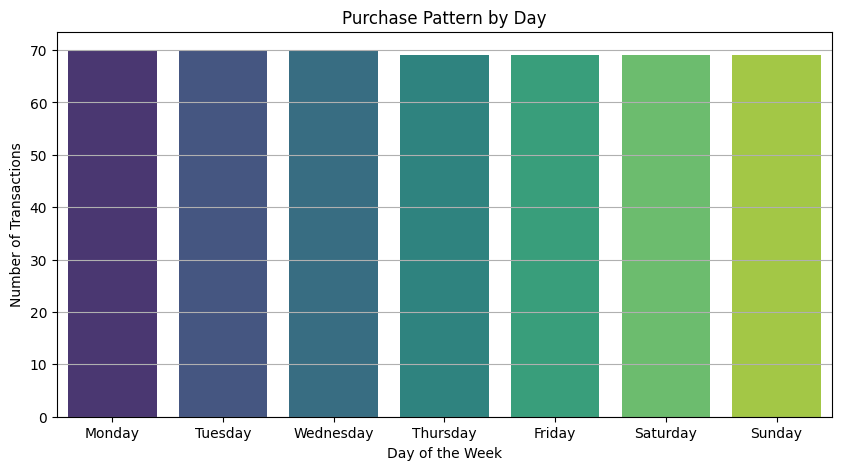

In [132]:
# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=sales_per_day, x="Day_of_Week", y="Transaction_Count", palette="viridis")

# Format the plot
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.title("Purchase Pattern by Day")
plt.grid(axis="y")

plt.show()


The bar chart illustrates the purchasing pattern throughout the week. Transaction volumes are slightly higher on Monday, Tuesday, and Wednesday compared to the other days. Nevertheless, the overall number of transactions remains relatively consistent across all days of the week.



##Analysis of Sales Trends Over Time

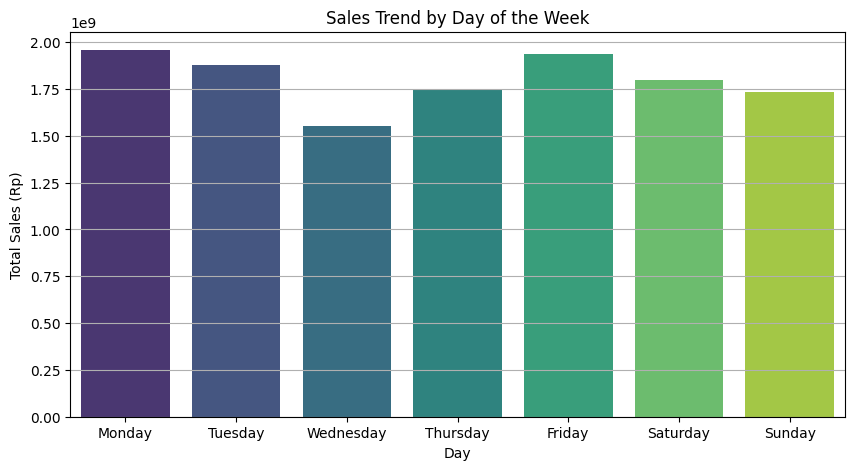

In [133]:
# Extract day of the week from the 'Date' column
datakuh["Day_of_Week"] = datakuh["Date"].dt.day_name()

# Calculate total sales per day of the week
daily_sales = datakuh.groupby("Day_of_Week")["Total_Sales"].sum().reset_index()

# Sort the days in the correct weekly order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales["Day_of_Week"] = pd.Categorical(daily_sales["Day_of_Week"],
                                            categories=days_order, ordered=True)
daily_sales = daily_sales.sort_values("Day_of_Week")

# Plot the sales trend per day of the week
plt.figure(figsize=(10,5))
sns.barplot(data=daily_sales, x="Day_of_Week",
            y="Total_Sales", palette="viridis")

# Format the plot
plt.xlabel("Day")
plt.ylabel("Total Sales (Rp)")
plt.title("Sales Trend by Day of the Week")
plt.grid(axis="y")

plt.show()


Total sales by day of the week. Monday recorded the highest sales with a total of nearly 2 billion Rupiah, while Wednesday had the lowest sales with a total of just over 1.5 billion Rupiah

##Analysis of Top and Bottom Selling Products

In [135]:
# Calculate the number of transactions per product
product_sales = datakuh["Product"].value_counts().reset_index()
product_sales.columns = ["Product", "Transaction_Count"]

# Retrieve the top 5 products with the highest number of transactions
top_products = product_sales.head(5)
top_products


,Product,Transaction_Count
0,Tablet,110
1,Laptop,102
2,Smartphone,94
3,Smartwatch,91
4,Headphones,89


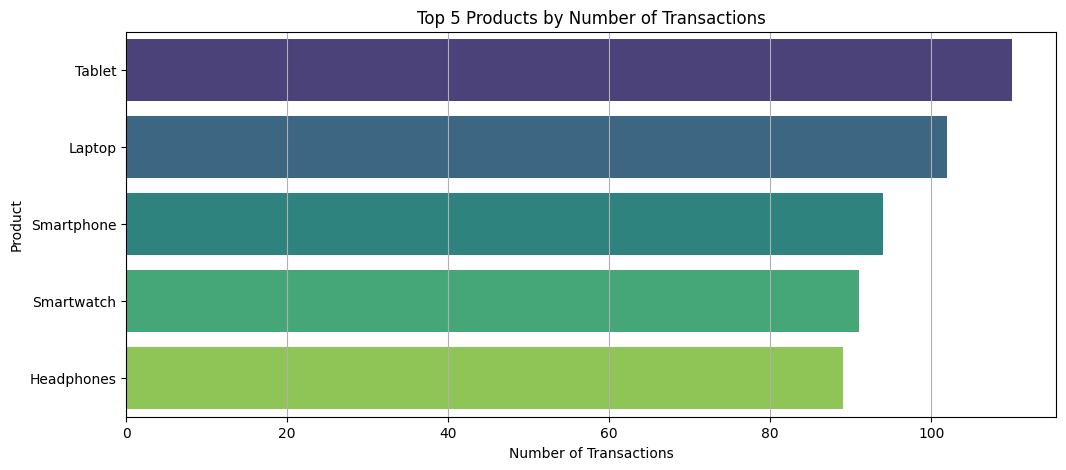

In [138]:
# Plot bar chart of top-selling products by number of transactions
plt.figure(figsize=(12, 5))
sns.barplot(data=top_products, x="Transaction_Count", y="Product", palette="viridis")
plt.xlabel("Number of Transactions")
plt.ylabel("Product")
plt.title("Top 5 Products by Number of Transactions")
plt.grid(axis="x")
plt.show()


The bar chart illustrates the top five products with the highest number of transactions. Among these, tablets lead with approximately 110 transactions, making them the most frequently purchased item. Laptops follow closely behind with around 102 transactions. Smartphones take the third spot with about 94 transactions, slightly ahead of smartwatches, which recorded roughly 92 transactions. Headphones complete the list with approximately 90 transactions. Overall, the data suggests that tablets and laptops are the most popular products, indicating strong customer interest and demand in these categories.


##Product Performance Analysis

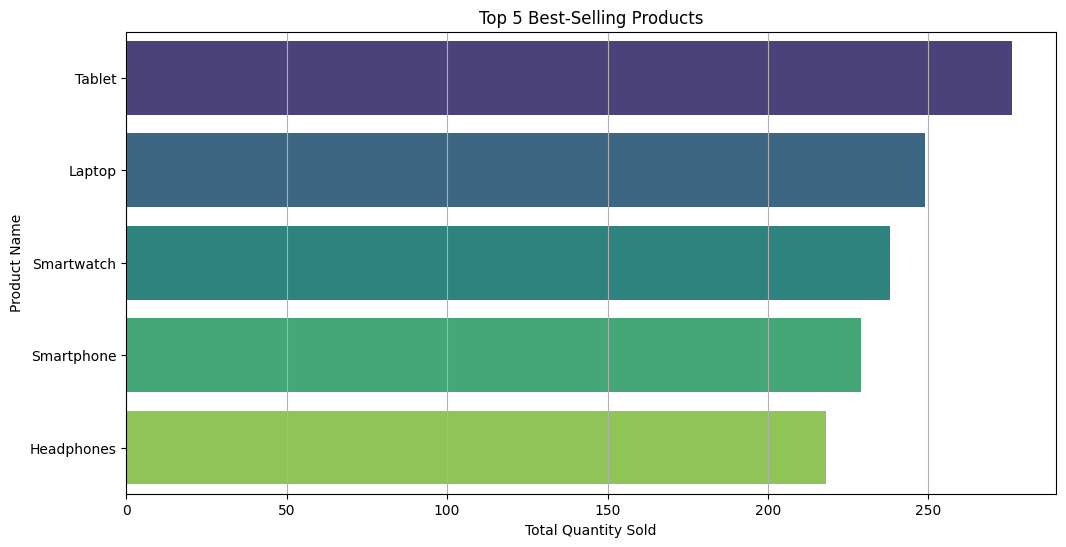

In [140]:
# Calculate total quantity sold per product
top_products = datakuh.groupby("Product")["Quantity"].sum().reset_index()

# Sort by highest quantity sold and select top 10
top_products = top_products.sort_values(by="Quantity", ascending=False).head(10)

# Visualize the best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="Quantity", y="Product", palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 5 Best-Selling Products")
plt.grid(axis="x")
plt.show()


The bar chart illustrates the five best-selling products based on the total quantity sold. Tablets top the list with approximately 275 units sold, making them the most popular product among the five. Laptops follow closely with around 250 units sold, indicating strong demand as well. In third place are smartwatches, with roughly 235 units sold, slightly ahead of smartphones, which reached about 225 units. Headphones complete the list with an estimated 215 units sold. Overall, the chart highlights tablets and laptops as the leading products in sales volume, suggesting a significant consumer preference for these categories.

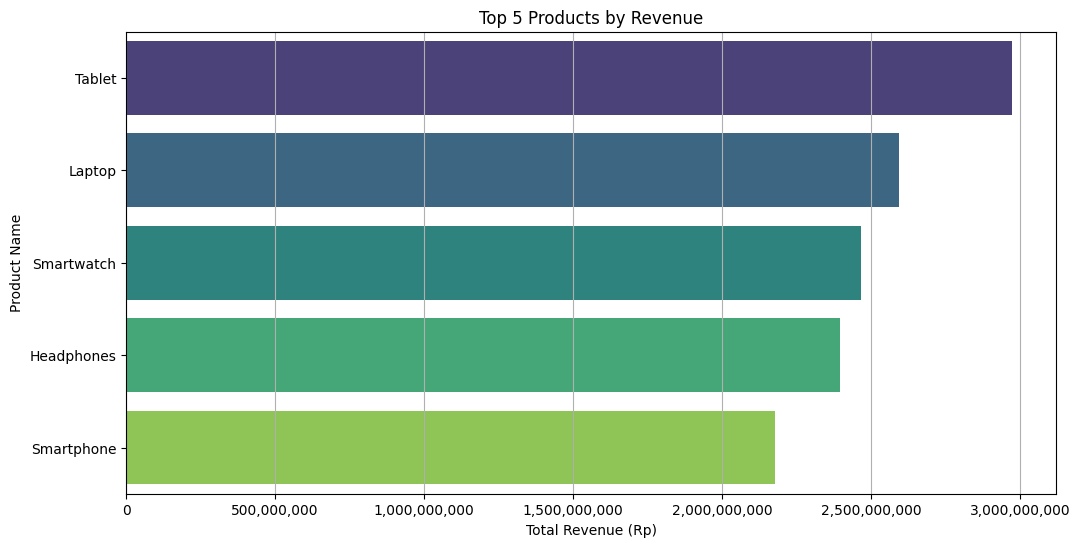

In [141]:
# Calculate total revenue per product
top_revenue_products = datakuh.groupby("Product")["Total_Sales"].sum().reset_index()

# Sort by highest revenue and select top 10
top_revenue_products = top_revenue_products.sort_values(by="Total_Sales", ascending=False).head(10)

# Visualize the top revenue-generating products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue_products, x="Total_Sales",
            y="Product", palette="viridis")
plt.xlabel("Total Revenue (Rp)")
plt.ylabel("Product Name")
plt.title("Top 5 Products by Revenue")
plt.grid(axis="x")
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))  # Format numbers
plt.show()


The chart shows that tablets are the leading product in terms of revenue, contributing almost Rp 3 billion. Laptops also generate significant income, exceeding Rp 2.6 billion. Smartwatches and headphones follow closely, with earnings near Rp 2.5 billion and Rp 2.4 billion, respectively. Despite being a commonly used device, smartphones recorded the lowest revenue among the top five, with around Rp 2.1 billion. This suggests that tablets and laptops not only sell well but may also have higher price points, contributing to greater total revenue.

#Analyzing the Distribution of Sold Product Prices

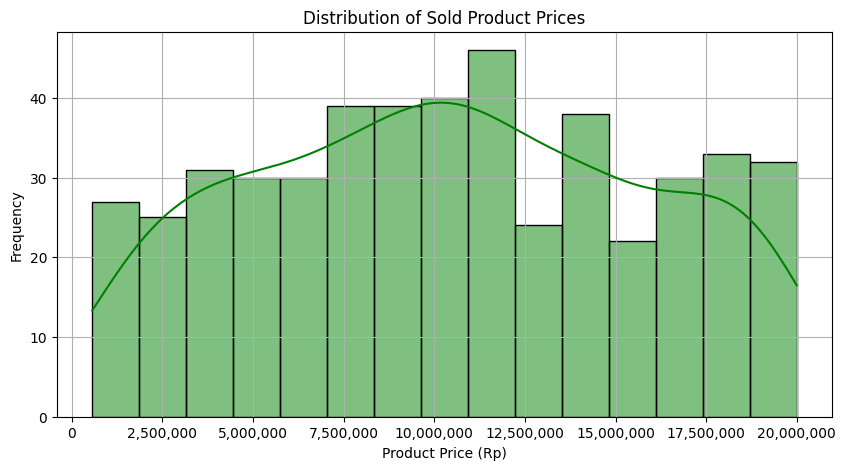

In [143]:
# Plot the distribution of product prices sold
plt.figure(figsize=(10,5))
sns.histplot(datakuh["Price"], bins=15, kde=True, color="g")

# Format the X-axis to make the numbers easier to read
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{int(x):,}'))

# Format the plot
plt.xlabel("Product Price (Rp)")
plt.ylabel("Frequency")
plt.title("Distribution of Sold Product Prices")
plt.grid(True)

plt.show()


The histogram illustrates the distribution of sold product prices. The most frequently sold products fall within the price range of Rp 10,000,000 to Rp 12,500,000, with over 45 sales in that category. Additionally, the ranges of Rp 7,500,000–10,000,000 and Rp 12,500,000–15,000,000 also show high sales frequencies, indicating strong consumer interest in mid-to-high priced products. Although sales also occur at lower (below Rp 2,500,000) and higher price points (above Rp 17,500,000), their frequencies are relatively lower. Overall, the price distribution is nearly normal but slightly right-skewed, suggesting a concentration of sales in the mid-price range.

#Correlation Analysis Between Variables

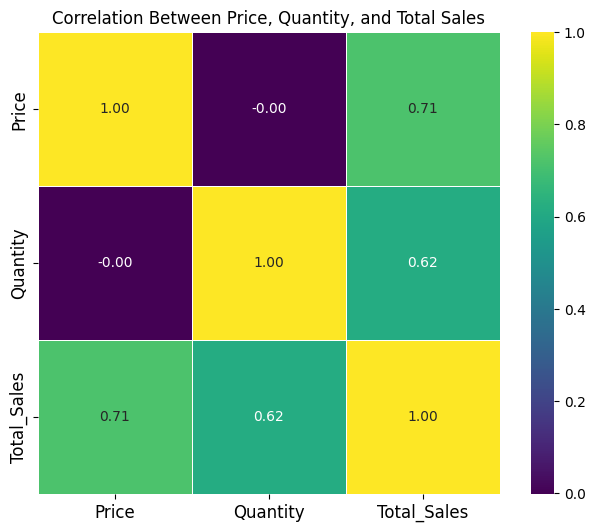

In [145]:
# Calculate the correlation between numeric variables
correlation_matrix = datakuh[["Price", "Quantity", "Total_Sales"]].corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,
            cmap="viridis", fmt=".2f",
            cbar=True, linewidth=0.5, square=True)

# Format the plot
plt.title("Correlation Between Price, Quantity, and Total Sales")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


The most influential factor on Total Sales is Price, followed by Quantity. Since both have positive correlations with total sales, increasing either can lead to higher sales. However, price and quantity appear to be independent of each other.

#Conclusion

From the analysis above, it can be concluded that the total sales from January 2024 to April 2025 amounted to IDR 12,606,791,998 (Twelve billion, six hundred six million, seven hundred ninety-one thousand, nine hundred and eight Rupiah). The highest sales occurred in September 2024, exceeding 900 million Rupiah. The category with the highest sales was Electronics, with sales of 7 billion Rupiah. The most frequently used payment method was bank transfer, accounting for 27.4%. The city with the highest number of transactions was Surabaya, with more than 100 transactions and total sales exceeding 2.8 billion Rupiah. In a week, the most transactions occurred on Monday, Tuesday, and Wednesday, with 70 transactions. The most purchased product was a tablet, with over 100 units sold and total sales exceeding 3 billion Rupiah.